# **Data Modeling**

## **Installing and importing dependencies and dataframes**

In [ ]:
!pip install dill &> /dev/null

In [ ]:
import pandas as pd
import dill

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

from scipy.spatial.distance import euclidean

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/DC_Inter/'
with open(path+'stats_per_90_clean.pkl','rb') as f: # Importing the stats
    stats = dill.load(f)

In [ ]:
with open(path+'players.pkl','rb') as f: # Importing the players data
    players = dill.load(f)

In [ ]:
stats.head()

,index,yellow_cards_per90,red_cards_per90,progressive_carries_per90,progressive_passes_per90,passes_attempted_per90,short_passes_attempted_per90,Short passes completed%,medium_passes_attempted_per90,Medium passes completed%,...,carries_final_third_per90,carries_into_penalty_area_per90,miscontrols_per90,dispossessed_per90,fouls_committed_per90,penalties_conceded_per90,own_goals_per90,ball_recoveries_per90,aerial_duels_per90,% of aerial duels won
0,0,0.282132,0.0,0.987461,3.526646,45.423197,15.940439,78.8,18.338558,73.1,...,0.705329,0.141066,1.69279,1.269592,1.128527,0.0,0.0,6.912226,2.962382,47.6
1,1,0.373057,0.093264,2.518135,3.170984,43.647668,16.041451,79.7,17.160622,63.6,...,1.678756,0.373057,2.145078,0.373057,0.746114,0.093264,0.0,4.569948,1.678756,50.0
2,2,0.340909,0.0,0.852273,3.068182,47.215909,20.965909,78.0,18.238636,76.6,...,0.511364,0.0,1.363636,1.022727,1.363636,0.0,0.0,7.670455,2.897727,52.9
3,3,0.26087,0.0,0.26087,2.521739,40.956522,9.913043,79.8,19.130435,82.3,...,0.086957,0.0,0.608696,0.086957,1.652174,0.0,0.086957,5.304348,3.913043,66.7
4,4,0.24714,0.04119,0.617849,3.954233,44.814645,9.144165,69.8,21.295195,74.1,...,0.370709,0.0,0.700229,0.08238,0.864989,0.08238,0.0,4.819222,5.684211,68.8


In [ ]:
players.head()

,index,League,Season,Team,Player,Nation,Position,Age,Born
0,0,ARG-Primera División Argentina,2223,Aldosivi,Fernando Román,PAR,DF,23,1998
1,1,ARG-Primera División Argentina,2223,Aldosivi,Ian Escobar,ARG,DF,25,1996
2,2,ARG-Primera División Argentina,2223,Aldosivi,Joaquín Indacoechea,ARG,DF,21,2000
3,3,ARG-Primera División Argentina,2223,Aldosivi,Mario López Quintana,PAR,DF,26,1995
4,4,ARG-Primera División Argentina,2223,Aldosivi,Nicolás Valentini,ARG,DF,20,2001


## **Data Normalization**

Initially we go to normalize all the stats with a *min-max normalization* so that all are in the range 0 and 1.

In [ ]:
stats_normalized = stats.drop('index', axis=1)
x = stats_normalized.values
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
stats_normalized = pd.DataFrame(x_scaled)

In [ ]:
stats_normalized.describe()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
count,2546.000000,2546.000000,2546.000000,2546.000000,2546.000000,2546.000000,2546.000000,2546.000000,2546.000000,2546.000000,...,2546.000000,2546.000000,2546.000000,2546.000000,2546.000000,2546.000000,2546.000000,2546.000000,2546.000000,2546.000000
mean,0.214828,0.042626,0.231390,0.174937,0.355258,0.315221,0.772282,0.363923,0.692109,0.350419,...,0.204452,0.064894,0.199316,0.169472,0.304544,0.067549,0.034311,0.480058,0.277493,0.533502
std,0.131461,0.099054,0.182470,0.078071,0.127323,0.143712,0.113514,0.145013,0.177714,0.140361,...,0.160278,0.101194,0.136989,0.150036,0.140563,0.121935,0.106172,0.142711,0.142705,0.126226
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.123796,0.000000,0.084005,0.120320,0.268747,0.209524,0.708046,0.265551,0.570833,0.253792,...,0.067257,0.000000,0.093690,0.057031,0.203061,0.000000,0.000000,0.382592,0.168938,0.458000
50%,0.199048,0.000000,0.184309,0.165824,0.346483,0.295644,0.788506,0.342205,0.714583,0.340432,...,0.168255,0.024395,0.166136,0.126284,0.288923,0.000000,0.000000,0.473463,0.253020,0.548000
75%,0.292743,0.000000,0.345305,0.216524,0.428039,0.400795,0.852874,0.442804,0.841667,0.433846,...,0.309630,0.085766,0.277655,0.241306,0.384116,0.113193,0.000000,0.567576,0.361500,0.623000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
stats_normalized.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.275340,0.000000,0.169601,0.177147,0.300369,0.262425,0.583908,0.281883,0.491667,0.309804,...,0.148903,0.05115,0.369665,0.494573,0.324387,0.000000,0.000000,0.642567,0.268760,0.476
1,0.364076,0.293782,0.432502,0.156435,0.280561,0.264714,0.604598,0.255831,0.293750,0.325380,...,0.354404,0.13527,0.468434,0.145325,0.202105,0.270812,0.000000,0.351422,0.143729,0.500
2,0.332702,0.000000,0.146382,0.150448,0.320370,0.376277,0.565517,0.279673,0.564583,0.247523,...,0.107955,0.00000,0.297786,0.398406,0.399566,0.000000,0.000000,0.736814,0.262462,0.529
3,0.254589,0.000000,0.044806,0.118626,0.250537,0.125875,0.606897,0.299397,0.683333,0.477237,...,0.018357,0.00000,0.132925,0.033874,0.491830,0.000000,0.484541,0.442708,0.361358,0.667
4,0.241190,0.129748,0.106119,0.202047,0.293580,0.108456,0.377011,0.347274,0.512500,0.594848,...,0.078261,0.00000,0.152913,0.032091,0.240117,0.239207,0.000000,0.382407,0.533878,0.688


## **Clustering**

Let's carry out an additional filtering of players using a clustering algorithm. The algorithm that will be used is the *k-means algorithm*.

### **Elbow method and Silhouette analysis for determining best *k***

We use two methods to determine the right number of clusters within our data. These two methods are:
* Elbow method
* Silhouette analysis

#### **Elbow Method**

In [ ]:
## Determining elbow
wcss = []

for i in range(1,11):
    model = KMeans(n_clusters = i, n_init = 'auto', init = "k-means++", max_iter = 1000, random_state=42)
    model.fit(stats_normalized)
    wcss.append(model.inertia_)

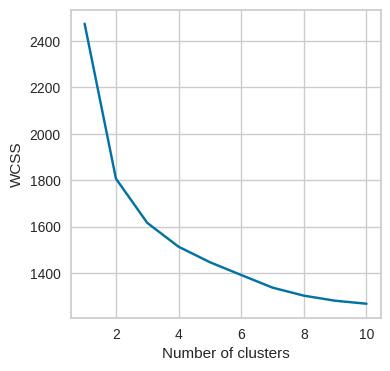

In [ ]:
plt.figure(figsize=(4, 4))
plt.plot(range(1,11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

We can see the presence of an elbow both when *k* is equal to 2 and when it is equal to 3.

#### **Silhouette Analysis**

In [ ]:
sil = []
kmax = 10

for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k, n_init = 'auto', init = "k-means++", max_iter = 1000, random_state=42).fit(stats_normalized)
  labels = kmeans.labels_
  sil.append(silhouette_score(x, labels, metric = 'euclidean'))

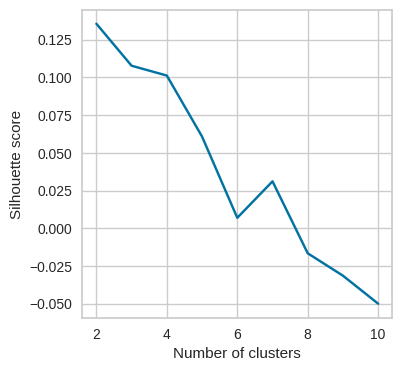

In [ ]:
plt.figure(figsize=(4, 4))
plt.plot(range(2,11), sil)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

The best results in terms of *Silhouette score* are obtained when k is between 2 and 4.

From the analysis below, we can see that the optimal number of clusters could be both 2 or 3.
Thus, we make some further analysis on the Silhouette score, considering only *k* between 2 and 5, since we have seen that we did not obtained good results when *k* is greater than 5.

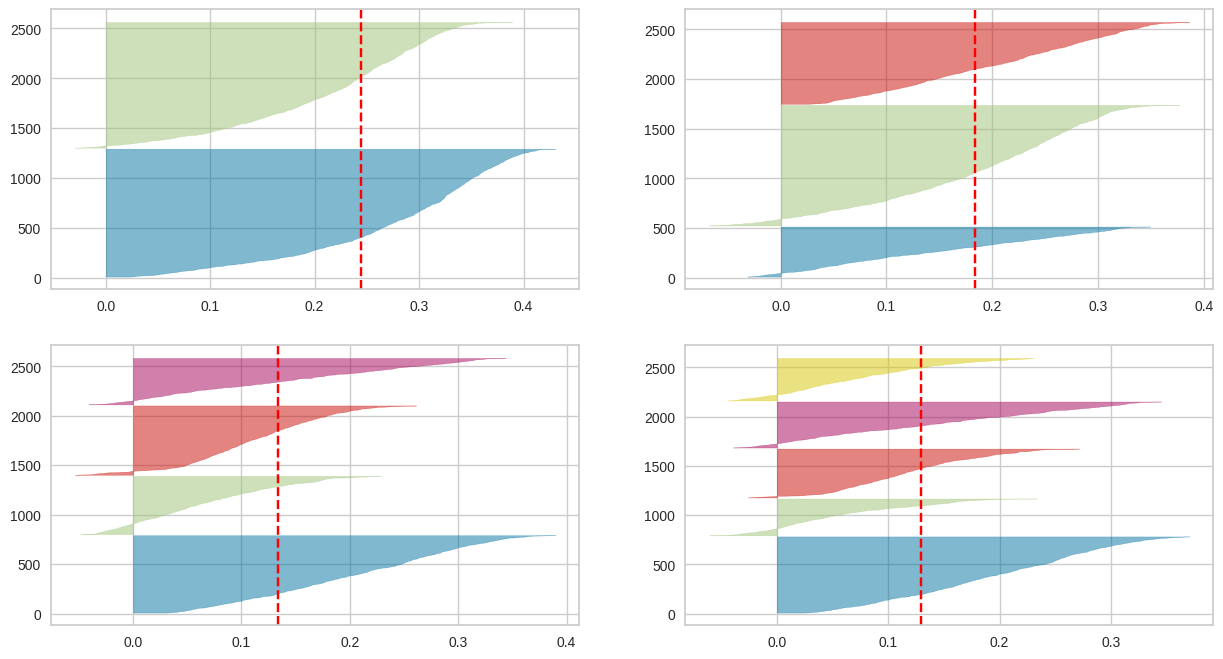

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init='auto', max_iter=1000, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(stats_normalized)

Given that the thickness of the plot representing each cluster is more uniform in the graph with two clusters with respect to the one with three clusters, we select as optimal number of clusters *k = 2*.

### **Modeling**

In [ ]:
model = KMeans(n_clusters = 2, n_init = 'auto', init = "k-means++", max_iter = 1000, random_state=42)
model.fit(stats_normalized)

KMeans(max_iter=1000, n_clusters=2, n_init='auto', random_state=42)

We assign the variable *labels* to all dataframes, both those with statistics (normalized and not) and the dataframe related to player data.

In [ ]:
players['labels'] = model.labels_
stats['labels'] = model.labels_
stats_normalized['labels'] = model.labels_

Let's check how the labels were assigned from a perspective of our knowledge of the players, so let's analyze the defenders of 5 Italian teams.

In [ ]:
players[players['Team'] == 'Inter']

,index,League,Season,Team,Player,Nation,Position,Age,Born,labels
1623,1633,ITA-Serie A,2223,Inter,Alessandro Bastoni,ITA,DF,23,1999,0
1624,1634,ITA-Serie A,2223,Inter,Danilo D'Ambrosio,ITA,DF,33,1988,0
1625,1635,ITA-Serie A,2223,Inter,Denzel Dumfries,NED,DF,26,1996,1
1626,1636,ITA-Serie A,2223,Inter,Federico Dimarco,ITA,DF,24,1997,1
1627,1637,ITA-Serie A,2223,Inter,Francesco Acerbi,ITA,DF,34,1988,0
1628,1638,ITA-Serie A,2223,Inter,Matteo Darmian,ITA,DF,32,1989,1
1629,1639,ITA-Serie A,2223,Inter,Milan Škriniar,SVK,DF,27,1995,0
1630,1640,ITA-Serie A,2223,Inter,Robin Gosens,GER,DF,28,1994,1
1631,1641,ITA-Serie A,2223,Inter,Stefan de Vrij,NED,DF,30,1992,0


In [ ]:
players[players['Team'] == 'Milan']

,index,League,Season,Team,Player,Nation,Position,Age,Born,labels
1656,1666,ITA-Serie A,2223,Milan,Alexis Saelemaekers,BEL,"FW,DF",23,1999,1
1657,1667,ITA-Serie A,2223,Milan,Davide Calabria,ITA,DF,25,1996,1
1658,1668,ITA-Serie A,2223,Milan,Fikayo Tomori,ENG,DF,24,1997,0
1659,1669,ITA-Serie A,2223,Milan,Fodé Ballo-Touré,SEN,DF,25,1997,1
1660,1670,ITA-Serie A,2223,Milan,Junior Messias,BRA,"FW,DF",31,1991,1
1661,1671,ITA-Serie A,2223,Milan,Malick Thiaw,GER,DF,20,2001,0
1662,1672,ITA-Serie A,2223,Milan,Matteo Gabbia,ITA,DF,22,1999,0
1663,1673,ITA-Serie A,2223,Milan,Pierre Kalulu,FRA,DF,22,2000,0
1664,1674,ITA-Serie A,2223,Milan,Simon Kjær,DEN,DF,33,1989,0
1665,1675,ITA-Serie A,2223,Milan,Theo Hernández,FRA,DF,24,1997,1


In [ ]:
players[players['Team'] == 'Juventus']

,index,League,Season,Team,Player,Nation,Position,Age,Born,labels
1632,1642,ITA-Serie A,2223,Juventus,Alex Sandro,BRA,DF,31,1991,0
1633,1643,ITA-Serie A,2223,Juventus,Daniele Rugani,ITA,DF,28,1994,0
1634,1644,ITA-Serie A,2223,Juventus,Danilo,BRA,DF,31,1991,0
1635,1645,ITA-Serie A,2223,Juventus,Federico Chiesa,ITA,"DF,MF",24,1997,1
1636,1646,ITA-Serie A,2223,Juventus,Federico Gatti,ITA,DF,24,1998,0
1637,1647,ITA-Serie A,2223,Juventus,Filip Kostić,SRB,"DF,FW",29,1992,1
1638,1648,ITA-Serie A,2223,Juventus,Gleison Bremer,BRA,DF,25,1997,0
1639,1649,ITA-Serie A,2223,Juventus,Juan Cuadrado,COL,"DF,FW",34,1988,1
1640,1650,ITA-Serie A,2223,Juventus,Leonardo Bonucci,ITA,DF,35,1987,0
1641,1651,ITA-Serie A,2223,Juventus,Mattia De Sciglio,ITA,DF,29,1992,1


In [ ]:
players[players['Team'] == 'Lazio']

,index,League,Season,Team,Player,Nation,Position,Age,Born,labels
1643,1653,ITA-Serie A,2223,Lazio,Adam Marušić,MNE,DF,29,1992,0
1644,1654,ITA-Serie A,2223,Lazio,Alessio Romagnoli,ITA,DF,27,1995,0
1645,1655,ITA-Serie A,2223,Lazio,Elseid Hysaj,ALB,DF,28,1994,1
1646,1656,ITA-Serie A,2223,Lazio,Manuel Lazzari,ITA,DF,28,1993,1
1647,1657,ITA-Serie A,2223,Lazio,Nicolò Casale,ITA,DF,24,1998,0
1648,1658,ITA-Serie A,2223,Lazio,Patric,ESP,DF,29,1993,0


In [ ]:
players[players['Team'] == 'Roma']

,index,League,Season,Team,Player,Nation,Position,Age,Born,labels
1679,1689,ITA-Serie A,2223,Roma,Bryan Cristante,ITA,"MF,DF",27,1995,1
1680,1690,ITA-Serie A,2223,Roma,Chris Smalling,ENG,DF,32,1989,0
1681,1691,ITA-Serie A,2223,Roma,Diego Llorente,ESP,DF,28,1993,0
1682,1692,ITA-Serie A,2223,Roma,Gianluca Mancini,ITA,DF,26,1996,0
1683,1693,ITA-Serie A,2223,Roma,Leonardo Spinazzola,ITA,DF,29,1993,1
1684,1694,ITA-Serie A,2223,Roma,Nicola Zalewski,POL,DF,20,2002,1
1685,1695,ITA-Serie A,2223,Roma,Rick Karsdorp,NED,DF,27,1995,1
1686,1696,ITA-Serie A,2223,Roma,Roger Ibanez,BRA,DF,23,1998,0
1687,1697,ITA-Serie A,2223,Roma,Stephan El Shaarawy,ITA,"DF,MF",29,1992,1
1688,1698,ITA-Serie A,2223,Roma,Zeki Çelik,TUR,DF,25,1997,1


By analyzing the collected players of Inter, Milan, Juventus, Roma and Lazio we can see how, essentially, the division also makes sense from a conceptual point of view. Indeed, we can see that:

* The label 0 is assigned to the centre-backs (es. Acerbi).
* The label 1 is assigned to fullbacks and/or outer midfielders (es. Dimarco).

We then consider only players belonging to the cluster of Francesco Acerbi, thus players labeled with 0.

In [ ]:
stats_normalized_0 = stats_normalized[stats_normalized['labels'] == 0].drop(['labels'], axis = 1)
stats_normalized_0['index'] = players[players['labels'] == 0]['index']

In [ ]:
stats_normalized_0.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,index
3,0.254589,0.000000,0.044806,0.118626,0.250537,0.125875,0.606897,0.299397,0.683333,0.477237,...,0.0,0.132925,0.033874,0.491830,0.000000,0.484541,0.442708,0.361358,0.667,3
4,0.241190,0.129748,0.106119,0.202047,0.293580,0.108456,0.377011,0.347274,0.512500,0.594848,...,0.0,0.152913,0.032091,0.240117,0.239207,0.000000,0.382407,0.533878,0.688,4
5,0.218129,0.469371,0.102370,0.127965,0.325571,0.171354,0.597701,0.413466,0.795833,0.447511,...,0.0,0.162697,0.116092,0.344700,0.216336,0.000000,0.477934,0.546253,0.603,5
7,0.181474,0.292872,0.159690,0.155862,0.374481,0.343628,0.721839,0.373920,0.689583,0.365682,...,0.0,0.203036,0.217312,0.350016,0.000000,0.000000,0.488343,0.369627,0.581,7
12,0.493446,0.000000,0.130264,0.199969,0.400005,0.276438,0.719540,0.396285,0.683333,0.536379,...,0.0,0.248433,0.147723,0.125203,0.000000,0.000000,0.663253,0.140272,0.462,12


In [ ]:
stats_normalized_0.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,index
3,0.254589,0.000000,0.044806,0.118626,0.250537,0.125875,0.606897,0.299397,0.683333,0.477237,...,0.0,0.132925,0.033874,0.491830,0.000000,0.484541,0.442708,0.361358,0.667,3
4,0.241190,0.129748,0.106119,0.202047,0.293580,0.108456,0.377011,0.347274,0.512500,0.594848,...,0.0,0.152913,0.032091,0.240117,0.239207,0.000000,0.382407,0.533878,0.688,4
5,0.218129,0.469371,0.102370,0.127965,0.325571,0.171354,0.597701,0.413466,0.795833,0.447511,...,0.0,0.162697,0.116092,0.344700,0.216336,0.000000,0.477934,0.546253,0.603,5
7,0.181474,0.292872,0.159690,0.155862,0.374481,0.343628,0.721839,0.373920,0.689583,0.365682,...,0.0,0.203036,0.217312,0.350016,0.000000,0.000000,0.488343,0.369627,0.581,7
12,0.493446,0.000000,0.130264,0.199969,0.400005,0.276438,0.719540,0.396285,0.683333,0.536379,...,0.0,0.248433,0.147723,0.125203,0.000000,0.000000,0.663253,0.140272,0.462,12


## **Defining a distance**

Now we need to find a distance that allows us to determine how similar a player is to Francesco Acerbi.
We then define a priori the fact that the more two players have 'close' statistics, the more similar these two players are.

Having said that, we then consider as distance the *Euclidean distance* calculated on all statistics.

Thus, we define the function to be applied to all the rows of our dataframe, based on the *Euclidean distance*.

In [ ]:
def distance(stats):
  acerbi = stats_normalized_0[stats_normalized_0['index'] == players[players['Player'] == 'Francesco Acerbi']['index'].values[0]].drop('index', axis = 1)
  stats_acerbi = acerbi.values[0]
  return euclidean(stats, stats_acerbi)

Let us apply the function to all the rows of the dataframe.

In [ ]:
stats_normalized_0['distance from acerbi'] = stats_normalized_0.drop('index',axis=1).apply(distance, axis = 1)

We also assign all the distances computed to the *players* dataframe (obviously only to the players belonging to the cluster 0).

In [ ]:
players_0 = players[players['labels'] == 0]
players_0['distance from acerbi'] = stats_normalized_0['distance from acerbi']

<ipython-input-28-01c9dc1b3715>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players_0['distance from acerbi'] = stats_normalized_0['distance from acerbi']


In [ ]:
players_0.sort_values(by=['distance from acerbi'])[1:6]

,index,League,Season,Team,Player,Nation,Position,Age,Born,labels,distance from acerbi
2154,2166,NED-Eredivisie,2223,PSV Eindhoven,Jarrad Branthwaite,ENG,DF,20,2002,0,0.504807
422,425,ENG-Premier League,2223,Arsenal,Gabriel Dos Santos,BRA,DF,24,1997,0,0.538934
1636,1646,ITA-Serie A,2223,Juventus,Federico Gatti,ITA,DF,24,1998,0,0.540120
1470,1480,GER-Bundesliga,2223,Freiburg,Matthias Ginter,GER,DF,28,1994,0,0.547508
2142,2154,NED-Eredivisie,2223,Heerenveen,Paweł Bochniewicz,POL,DF,26,1996,0,0.551666


We can see that with the developed method, the 5 players most similar to Acerbi turn out to be:
1. Jarrad Branthwaite
2. Gabriel Dos Santos
3. Federico Gatti
4. Matthias Ginter
5. Paweł Bochniewicz

## **Reconstruction of the Dataframe with players, stats and distance from Acerbi**

Next, we reconstruct the dataframe with the players data, statistics and the new feature computed, that is *distance from acerbi*.

In [ ]:
stats['labels'] = stats_normalized['labels']

In [ ]:
stats_0 = stats[stats['labels'] == 0]

In [ ]:
stats_0 = stats_0.drop('labels', axis=1)

In [ ]:
stats_0

,index,yellow_cards_per90,red_cards_per90,progressive_carries_per90,progressive_passes_per90,passes_attempted_per90,short_passes_attempted_per90,Short passes completed%,medium_passes_attempted_per90,Medium passes completed%,...,carries_final_third_per90,carries_into_penalty_area_per90,miscontrols_per90,dispossessed_per90,fouls_committed_per90,penalties_conceded_per90,own_goals_per90,ball_recoveries_per90,aerial_duels_per90,% of aerial duels won
3,3,0.26087,0.0,0.26087,2.521739,40.956522,9.913043,79.8,19.130435,82.3,...,0.086957,0.0,0.608696,0.086957,1.652174,0.0,0.086957,5.304348,3.913043,66.7
4,4,0.24714,0.04119,0.617849,3.954233,44.814645,9.144165,69.8,21.295195,74.1,...,0.370709,0.0,0.700229,0.08238,0.864989,0.08238,0.0,4.819222,5.684211,68.8
5,5,0.22351,0.149007,0.596026,2.682119,47.682119,11.92053,79.4,24.288079,87.7,...,0.298013,0.0,0.745033,0.298013,1.192053,0.074503,0.0,5.587748,5.811258,60.3
7,7,0.18595,0.092975,0.929752,3.161157,52.066116,19.524793,84.8,22.5,82.6,...,0.557851,0.0,0.929752,0.557851,1.208678,0.0,0.0,5.671488,3.997934,58.1
12,12,0.505618,0.0,0.758427,3.918539,54.353933,16.558989,84.7,23.511236,82.3,...,0.505618,0.0,1.13764,0.379213,0.505618,0.0,0.0,7.078652,1.643258,46.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2538,2550,0.314685,0.0,0.41958,2.622378,44.370629,13.531469,93.0,22.867133,89.9,...,0.314685,0.0,0.20979,0.104895,0.839161,0.0,0.0,4.825175,2.937063,67.9
2539,2551,0.099502,0.049751,0.746269,2.835821,47.761194,15.373134,90.0,22.835821,85.4,...,0.348259,0.0,0.298507,0.199005,0.696517,0.0,0.0,4.427861,1.691542,55.9
2540,2552,0.193757,0.0,0.629709,3.632939,51.393972,18.406889,87.1,23.347686,81.1,...,0.58127,0.048439,0.726588,0.387513,0.920344,0.0,0.0,6.733046,3.003229,50.0
2543,2555,0.162984,0.0,0.130388,1.597247,35.302427,6.617168,89.2,21.807316,92.5,...,0.097791,0.032597,0.293372,0.065194,0.717131,0.097791,0.0,3.650851,3.064107,52.1


In [ ]:
players_0

,index,League,Season,Team,Player,Nation,Position,Age,Born,labels,distance from acerbi
3,3,ARG-Primera División Argentina,2223,Aldosivi,Mario López Quintana,PAR,DF,26,1995,0,1.309728
4,4,ARG-Primera División Argentina,2223,Aldosivi,Nicolás Valentini,ARG,DF,20,2001,0,1.193224
5,5,ARG-Primera División Argentina,2223,Aldosivi,Patricio Boolsen,ARG,DF,24,1998,0,1.018365
7,7,ARG-Primera División Argentina,2223,Aldosivi,Santiago Laquidaín,ARG,DF,20,2001,0,0.982226
12,12,ARG-Primera División Argentina,2223,Argentinos Jun,Leonel González,ARG,DF,27,1994,0,1.117630
...,...,...,...,...,...,...,...,...,...,...,...
2538,2550,USA-Major League Soccer,2223,Vancouver,Florian Jungwirth,GER,"DF,MF",33,1989,0,1.236681
2539,2551,USA-Major League Soccer,2223,Vancouver,Jake Nerwinski,USA,DF,27,1994,0,0.943916
2540,2552,USA-Major League Soccer,2223,Vancouver,Javain Brown,JAM,DF,22,1999,0,0.881186
2543,2555,USA-Major League Soccer,2223,Vancouver,Ranko Veselinović,SRB,DF,22,1999,0,1.073234


In [ ]:
final_df = players_0.merge(stats_0, on = 'index').drop('labels',axis=1)

In [ ]:
final_df.head()

,index,League,Season,Team,Player,Nation,Position,Age,Born,distance from acerbi,...,carries_final_third_per90,carries_into_penalty_area_per90,miscontrols_per90,dispossessed_per90,fouls_committed_per90,penalties_conceded_per90,own_goals_per90,ball_recoveries_per90,aerial_duels_per90,% of aerial duels won
0,3,ARG-Primera División Argentina,2223,Aldosivi,Mario López Quintana,PAR,DF,26,1995,1.309728,...,0.086957,0.0,0.608696,0.086957,1.652174,0.0,0.086957,5.304348,3.913043,66.7
1,4,ARG-Primera División Argentina,2223,Aldosivi,Nicolás Valentini,ARG,DF,20,2001,1.193224,...,0.370709,0.0,0.700229,0.08238,0.864989,0.08238,0.0,4.819222,5.684211,68.8
2,5,ARG-Primera División Argentina,2223,Aldosivi,Patricio Boolsen,ARG,DF,24,1998,1.018365,...,0.298013,0.0,0.745033,0.298013,1.192053,0.074503,0.0,5.587748,5.811258,60.3
3,7,ARG-Primera División Argentina,2223,Aldosivi,Santiago Laquidaín,ARG,DF,20,2001,0.982226,...,0.557851,0.0,0.929752,0.557851,1.208678,0.0,0.0,5.671488,3.997934,58.1
4,12,ARG-Primera División Argentina,2223,Argentinos Jun,Leonel González,ARG,DF,27,1994,1.117630,...,0.505618,0.0,1.13764,0.379213,0.505618,0.0,0.0,7.078652,1.643258,46.2


In [ ]:
final_df.sort_values(by=['distance from acerbi'])[1:6]

,index,League,Season,Team,Player,Nation,Position,Age,Born,distance from acerbi,...,carries_final_third_per90,carries_into_penalty_area_per90,miscontrols_per90,dispossessed_per90,fouls_committed_per90,penalties_conceded_per90,own_goals_per90,ball_recoveries_per90,aerial_duels_per90,% of aerial duels won
1088,2166,NED-Eredivisie,2223,PSV Eindhoven,Jarrad Branthwaite,ENG,DF,20,2002,0.504807,...,0.496988,0.045181,0.225904,0.045181,0.542169,0.0,0.0,6.641566,4.924699,56.9
220,425,ENG-Premier League,2223,Arsenal,Gabriel Dos Santos,BRA,DF,24,1997,0.538934,...,1.13523,0.079202,0.501613,0.105603,0.660018,0.052801,0.0,5.042534,4.646524,56.8
818,1646,ITA-Serie A,2223,Juventus,Federico Gatti,ITA,DF,24,1998,0.540120,...,0.870166,0.062155,0.497238,0.372928,0.994475,0.0,0.0,6.029006,3.604972,55.2
729,1480,GER-Bundesliga,2223,Freiburg,Matthias Ginter,GER,DF,28,1994,0.547508,...,0.352941,0.0,0.352941,0.117647,0.676471,0.0,0.0,5.411765,5.529412,63.3
1079,2154,NED-Eredivisie,2223,Heerenveen,Paweł Bochniewicz,POL,DF,26,1996,0.551666,...,0.77293,0.030917,0.649261,0.154586,0.803847,0.0,0.0,5.410512,5.070423,72.0


In [ ]:
sorted_final_df = final_df.sort_values(by=['distance from acerbi'])

In [ ]:
sorted_final_df

,index,League,Season,Team,Player,Nation,Position,Age,Born,distance from acerbi,...,carries_final_third_per90,carries_into_penalty_area_per90,miscontrols_per90,dispossessed_per90,fouls_committed_per90,penalties_conceded_per90,own_goals_per90,ball_recoveries_per90,aerial_duels_per90,% of aerial duels won
812,1637,ITA-Serie A,2223,Inter,Francesco Acerbi,ITA,DF,34,1988,0.000000,...,1.224742,0.074227,0.482474,0.259794,0.630928,0.0,0.0,5.604124,4.453608,65.0
1088,2166,NED-Eredivisie,2223,PSV Eindhoven,Jarrad Branthwaite,ENG,DF,20,2002,0.504807,...,0.496988,0.045181,0.225904,0.045181,0.542169,0.0,0.0,6.641566,4.924699,56.9
220,425,ENG-Premier League,2223,Arsenal,Gabriel Dos Santos,BRA,DF,24,1997,0.538934,...,1.13523,0.079202,0.501613,0.105603,0.660018,0.052801,0.0,5.042534,4.646524,56.8
818,1646,ITA-Serie A,2223,Juventus,Federico Gatti,ITA,DF,24,1998,0.540120,...,0.870166,0.062155,0.497238,0.372928,0.994475,0.0,0.0,6.029006,3.604972,55.2
729,1480,GER-Bundesliga,2223,Freiburg,Matthias Ginter,GER,DF,28,1994,0.547508,...,0.352941,0.0,0.352941,0.117647,0.676471,0.0,0.0,5.411765,5.529412,63.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,34,ARG-Primera División Argentina,2223,Barracas Central,Brian Salvareschi,ARG,DF,22,1999,1.697292,...,0.111524,0.0,0.223048,0.111524,1.003717,0.111524,0.0,5.799257,6.579926,55.9
409,810,ESP-Segunda División,2223,FC Andorra,Adrià Vilanova,ESP,DF,25,1997,1.782417,...,2.225573,0.054282,0.542823,0.217129,0.868516,0.0,0.0,4.885404,3.365501,54.8
89,172,ARG-Primera División Argentina,2223,Sarmiento,Federico Rasmussen,ARG,DF,29,1992,1.790422,...,0.05992,0.0,0.599201,0.17976,1.258322,0.0,0.0,4.134487,3.415446,73.7
91,177,ARG-Primera División Argentina,2223,Sarmiento,Manuel Guanini,ARG,DF,25,1996,1.838236,...,0.282575,0.141287,0.847724,0.423862,2.119309,0.141287,0.0,2.967033,6.640502,63.8


In [ ]:
defenders = players_0.sort_values('distance from acerbi').drop(['index','labels'],axis=1)[1:]

In [ ]:
defenders.head()

,League,Season,Team,Player,Nation,Position,Age,Born,distance from acerbi
2154,NED-Eredivisie,2223,PSV Eindhoven,Jarrad Branthwaite,ENG,DF,20,2002,0.504807
422,ENG-Premier League,2223,Arsenal,Gabriel Dos Santos,BRA,DF,24,1997,0.538934
1636,ITA-Serie A,2223,Juventus,Federico Gatti,ITA,DF,24,1998,0.540120
1470,GER-Bundesliga,2223,Freiburg,Matthias Ginter,GER,DF,28,1994,0.547508
2142,NED-Eredivisie,2223,Heerenveen,Paweł Bochniewicz,POL,DF,26,1996,0.551666


## **Saving dataframes**

In [ ]:
with open(path+'sorted_defenders.pkl', 'wb') as f: # Saving of the dataframe with the players sorted by their distance from Acerbi
   dill.dump(sorted_final_df, f)

In [ ]:
with open(path+'not_sorted_defenders.pkl', 'wb') as f: # Saving also the not sorted dataframe
   dill.dump(final_df, f)

In [ ]:
with open(path+'sorted_defenders_nostats.pkl', 'wb') as f: # Saving the dataframe with players data and distance from Acerbi
   dill.dump(defenders, f)

In [ ]:
with open(path+'5difenders_list.pkl', 'wb') as f: # Saving the dataframe with the 5 players most similar to Acerbi
   dill.dump(defenders.head(), f)